In [1]:
import pandas as pd
from zipfile import ZipFile

# Zip dosyasının yolunu belirtme
zip_dosya_yolu = "C:\\Users\\ASUS\\Downloads\\titanic.zip"

# Zip dosyasını açma
with ZipFile(zip_dosya_yolu, 'r') as zip_dosya:
    # Zip dosyasının içindeki dosyaları listeleme
    print(zip_dosya.namelist())  # İçindekileri kontrol etmek için

    # Train.csv dosyasının ismi ve yolu
    csv_dosya_isim = "train.csv"
    csv_dosya_yolu = zip_dosya.extract(csv_dosya_isim)

# Veri setini yükleme
df = pd.read_csv(csv_dosya_yolu)

# Özet istatistikleri görüntüleme
print(df.describe())


['gender_submission.csv', 'test.csv', 'train.csv']
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [2]:
# Eksik veri kontrolü
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


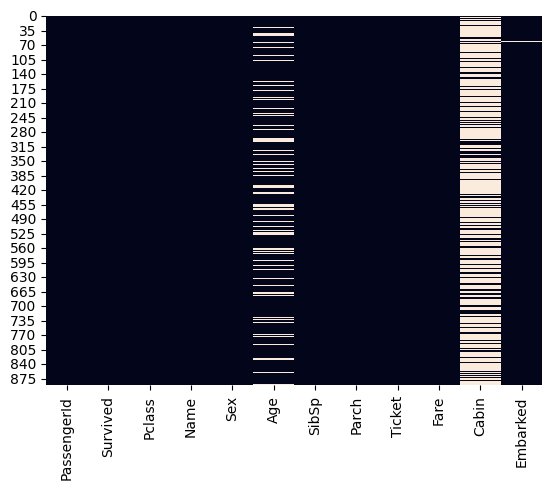

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eksik verilerin ısı haritasını oluşturma
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [4]:
# Eksik verileri içeren satırları çıkarma
df = df.dropna()

# Güncellenmiş veri setini kontrol etme
print(df.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# Kategorik değişkenleri içeren sütunları belirleme
kategorik_sutunlar = ['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket' ]  # Kategorik değişkenlerin isimlerini buraya ekleyin

# Her bir kategorik sütun için LabelEncoder kullanarak dönüşüm yapma
for sutun in kategorik_sutunlar:
    df[sutun] = label_encoder.fit_transform(df[sutun])

# Kodlanmış veri setini kontrol etme
print(df.head())


    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
1             2         1       1    49    0  38.0      1      0     109   
3             4         1       1    70    0  35.0      1      0      31   
6             7         0       1   112    1  54.0      0      0      55   
10           11         1       3   148    0   4.0      1      1     120   
11           12         1       1    27    0  58.0      0      0      26   

       Fare  Cabin  Embarked  
1   71.2833     72         0  
3   53.1000     48         2  
6   51.8625    117         2  
10  16.7000    131         2  
11  26.5500     43         2  


In [6]:
import pandas as pd
from zipfile import ZipFile

# Zip dosyasının yolunu belirtme
zip_dosya_yolu = "C:\\Users\\ASUS\\Downloads\\titanic.zip"

# Zip dosyasını açma
with ZipFile(zip_dosya_yolu, 'r') as zip_dosya:
    # Zip dosyasının içindeki dosyaları listeleme
    print(zip_dosya.namelist())  # İçindekileri kontrol etmek için

    # Train.csv dosyasının ismi ve yolu
    csv_dosya_isim = "test.csv"
    csv_dosya_yolu = zip_dosya.extract(csv_dosya_isim)

# Veri setini yükleme
df = pd.read_csv(csv_dosya_yolu)

# Özet istatistikleri görüntüleme
print(df.describe())


['gender_submission.csv', 'test.csv', 'train.csv']
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [7]:
# Eksik veri kontrolü
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


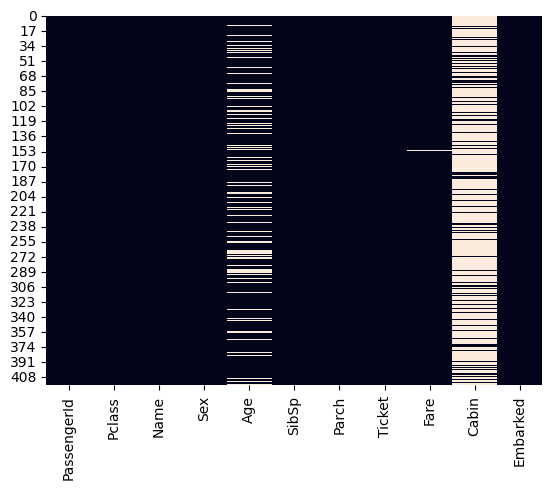

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eksik verilerin ısı haritasını oluşturma
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [9]:
# Eksik verileri içeren satırları çıkarma
df = df.dropna()

# Güncellenmiş veri setini kontrol etme
print(df.head())


    PassengerId  Pclass                                               Name  \
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24          916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26          918       1                       Ostby, Miss. Helene Ragnhild   
28          920       1                            Brady, Mr. John Bertram   

       Sex   Age  SibSp  Parch       Ticket      Fare            Cabin  \
12  female  23.0      1      0        21228   82.2667              B45   
14  female  47.0      1      0  W.E.P. 5734   61.1750              E31   
24  female  48.0      1      3     PC 17608  262.3750  B57 B59 B63 B66   
26  female  22.0      0      1       113509   61.9792              B36   
28    male  41.0      0      0       113054   30.5000              A21   

   Embarked  
12        S  
14        S  
24        C  
26        C  
28        S  


In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# Kategorik değişkenleri içeren sütunları belirleme
kategorik_sutunlar = ['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket' ]  # Kategorik değişkenlerin isimlerini buraya ekleyin

# Her bir kategorik sütun için LabelEncoder kullanarak dönüşüm yapma
for sutun in kategorik_sutunlar:
    df[sutun] = label_encoder.fit_transform(df[sutun])

# Kodlanmış veri setini kontrol etme
print(df.head())

    PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
12          904       1    72    0  23.0      1      0      32   82.2667   
14          906       1    15    0  47.0      1      0      65   61.1750   
24          916       1    66    0  48.0      1      3      53  262.3750   
26          918       1    60    0  22.0      0      1       9   61.9792   
28          920       1     9    1  41.0      0      0       7   30.5000   

    Cabin  Embarked  
12     12         2  
14     58         2  
24     15         0  
26     10         0  
28      2         2  


In [11]:
from sklearn.model_selection import train_test_split

# "test.csv" dosyasını yükleme
test_df = pd.read_csv("test.csv")

# Gerekli ön işlemleri yapın (eksik veri doldurma, kategorik değişkenlerin kodlanması vb.)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Age"]), df["Age"], test_size=0.2, random_state=42)

# X_train ve y_train, eğitim veri setini temsil eder
# X_test ve y_test, test veri setini temsil eder

In [21]:
import tensorflow as tf

# Input katmanını tanımlama
input_layer = tf.keras.layers.Input(shape=(10,))


# Modeli oluşturma
model = tf.keras.Sequential([
    input_layer,  # Input katmanını modelin ilk katmanı olarak ekliyoruz
    tf.keras.layers.Dense(10, activation='relu', input_shape=(10,)),  # Girdi katmanı
    # Gizli katmanlar
    tf.keras.layers.Dense(64, activation='relu'),  # Örneğin, 64 nöronlu bir gizli katman
    # Çıktı katmanı
    tf.keras.layers.Dense(1)  # Tek bir çıktı nöronu (yaş tahmini)
])

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy']) # Kayıp fonksiyonu olarak ortalama kare hatası (MSE) kullanıldı, ölçüm olarak ortalama mutlak hata (MAE) kullanıldı


In [13]:
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Age"]), df["Age"], test_size=0.2, random_state=42)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.0112 - loss: 3021.2129 - mae: 52.8960 - val_accuracy: 0.0000e+00 - val_loss: 1871.5951 - val_mae: 34.6081
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0112 - loss: 871.9978 - mae: 26.5083 - val_accuracy: 0.0000e+00 - val_loss: 779.5182 - val_mae: 23.0792
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0190 - loss: 314.0667 - mae: 14.3464 - val_accuracy: 0.0000e+00 - val_loss: 781.9079 - val_mae: 22.2885
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0112 - loss: 599.6795 - mae: 17.8756 - val_accuracy: 0.0000e+00 - val_loss: 959.8625 - val_mae: 25.8540
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0190 - loss: 616.7871 - mae: 21.4916 - val_accuracy: 0.0000e+00 - val_loss: 839.5446 - val_mae: 23.9029
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0190 - loss: 500.3826 - mae: 18.5499 - val_accuracy: 0.0000e+00 - val_loss: 658.8823 - val_mae: 20.0

In [14]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

# Modeli kaydetme
model.save("model.h5")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0190 - loss: 219.7075 - mae: 12.1922 - val_accuracy: 0.0000e+00 - val_loss: 328.0006 - val_mae: 14.5029
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0190 - loss: 220.3057 - mae: 12.4387 - val_accuracy: 0.0000e+00 - val_loss: 321.1638 - val_mae: 14.1733
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0190 - loss: 225.0007 - mae: 13.0734 - val_accuracy: 0.0000e+00 - val_loss: 321.4902 - val_mae: 14.1939
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0190 - loss: 247.7855 - mae: 12.6789 - val_accuracy: 0.0000e+00 - val_loss: 326.1876 - val_mae: 14.4032
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0112 - loss: 235.2460 - mae: 11.7260 - val_accuracy: 0.0000e+00 - val_loss: 351.4948 - val_mae: 15.4249
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0190 - loss: 220.5031 - mae: 11.6832 - val_accuracy: 0.0000e+00 - val_loss: 357.7485 - val_mae: 15.676

In [15]:
# Modeli değerlendirme
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test mean absolute error:", results[1])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 334.6232 - mae: 14.8764
Test loss: 334.6231689453125
Test mean absolute error: 0.0


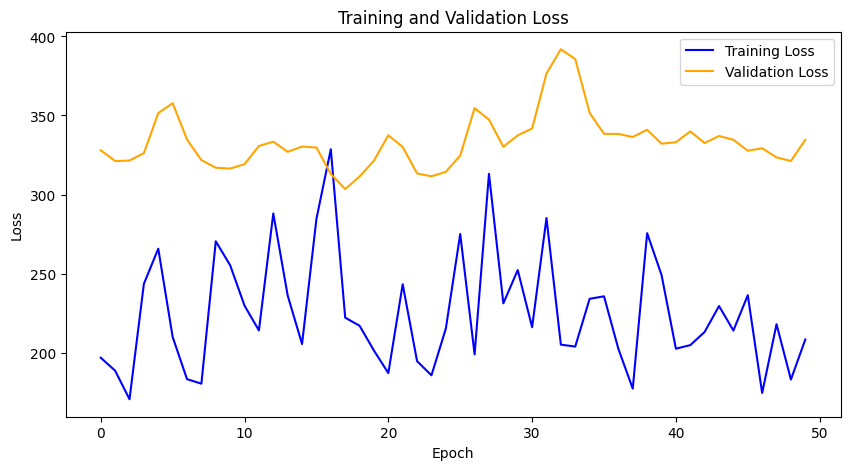

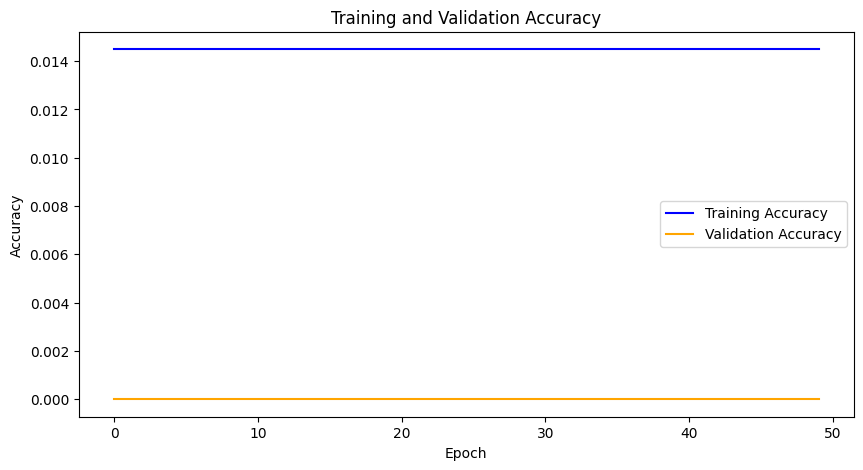

In [16]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını alın
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Eğitim ve doğrulama doğruluğunu alın
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Kayıp grafiğini çizin
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiğini çizin
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
print("y_test boyutu:", len(y_test))
print("predictions boyutu:", len(predictions))




y_test boyutu: 18
predictions boyutu: 18


In [18]:
print("y_test:", y_test)
print("predictions:", predictions)


y_test: 378    55.0
12     23.0
114    63.0
96     76.0
59     36.0
335    30.0
53     28.0
75     32.5
28     41.0
343    58.0
407    50.0
326    12.0
252    27.0
397    48.0
405    20.0
322    26.0
156    29.0
395    18.0
Name: Age, dtype: float64
predictions: [[45.3272  ]
 [37.747395]
 [44.41712 ]
 [34.247723]
 [35.621178]
 [45.620575]
 [36.42315 ]
 [38.735233]
 [32.11898 ]
 [37.145065]
 [52.261044]
 [38.673775]
 [40.227142]
 [47.109085]
 [43.81958 ]
 [41.84693 ]
 [37.80108 ]
 [49.104797]]


In [19]:
# Tahminler yapma
predictions = model.predict(X_test)

# Tahminlerle gerçek değerler arasındaki farkı değerlendirme
for i in range(len(predictions)):
    print("Gerçek Değer:", y_test[395], "Tahmin:", predictions[i])

# Farklı metrikler kullanarak tahminlerinizi değerlendirme (örneğin MSE veya MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Gerçek Değer: 18.0 Tahmin: [45.3272]
Gerçek Değer: 18.0 Tahmin: [37.747395]
Gerçek Değer: 18.0 Tahmin: [44.41712]
Gerçek Değer: 18.0 Tahmin: [34.247723]
Gerçek Değer: 18.0 Tahmin: [35.621178]
Gerçek Değer: 18.0 Tahmin: [45.620575]
Gerçek Değer: 18.0 Tahmin: [36.42315]
Gerçek Değer: 18.0 Tahmin: [38.735233]
Gerçek Değer: 18.0 Tahmin: [32.11898]
Gerçek Değer: 18.0 Tahmin: [37.145065]
Gerçek Değer: 18.0 Tahmin: [52.261044]
Gerçek Değer: 18.0 Tahmin: [38.673775]
Gerçek Değer: 18.0 Tahmin: [40.227142]
Gerçek Değer: 18.0 Tahmin: [47.109085]
Gerçek Değer: 18.0 Tahmin: [43.81958]
Gerçek Değer: 18.0 Tahmin: [41.84693]
Gerçek Değer: 18.0 Tahmin: [37.80108]
Gerçek Değer: 18.0 Tahmin: [49.104797]
Mean Squared Error (MSE): 334.6231992800571
Mean Absolute Error (MAE): 14.87635252210829
